In [1]:
from keras import layers
from keras import models
from keras import optimizers

from keras import losses
from keras import metrics

import numpy as nop

Using TensorFlow backend.


model.compile(optimizer = optimizers.RMSprop(lr=0.001), 
                loss = 'mse', 
                metrics = ['accuracy'])
model.fit(input_tensor, target_tensor, batch_size = 128, epochs = 10)

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = nop.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = nop.asarray(train_labels).astype('float32')
y_test = nop.asarray(test_labels).astype('float32')

In [11]:
model = models.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile()

In [12]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrices = ['accuracy'])

In [13]:
model.compile(optimizer = optimizers.RMSprop(lr=0.001), 
              loss = 'binary_crossentropy', 
              metrices = ['accuracy'])

In [14]:
model.compile(optimizer = optimizers.RMSprop(lr=0.001), 
              loss = losses.binary_crossentropy, 
              metrices = [metrics.binary_accuracy])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 15,
                   batch_size = 600,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 4s 271us/step - loss: 0.5224 - acc: 0.7814 - val_loss: 0.4024 - val_acc: 0.8596
Epoch 2/15
15000/15000 [==============================] - 2s 108us/step - loss: 0.3124 - acc: 0.9009 - val_loss: 0.3101 - val_acc: 0.8852
Epoch 3/15
15000/15000 [==============================] - 2s 108us/step - loss: 0.2311 - acc: 0.9235 - val_loss: 0.2809 - val_acc: 0.8905
Epoch 4/15
15000/15000 [==============================] - 2s 107us/step - loss: 0.1803 - acc: 0.9422 - val_loss: 0.2810 - val_acc: 0.8863
Epoch 5/15
15000/15000 [==============================] - 2s 106us/step - loss: 0.1490 - acc: 0.9529 - val_loss: 0.2878 - val_acc: 0.8858
Epoch 6/15
15000/15000 [==============================] - 2s 107us/step - loss: 0.1255 - acc: 0.9591 - val_loss: 0.3004 - val_acc: 0.8841
Epoch 7/15
15000/15000 [==============================] - 2s 111us/step - loss: 0.1036 - acc: 0.9699 - val_loss: 0.3043 - 

In [20]:
history_dict = history.history
history_dict.keys()

[u'acc', u'loss', u'val_acc', u'val_loss']



['acc', 'loss', 'val_acc', 'val_loss']

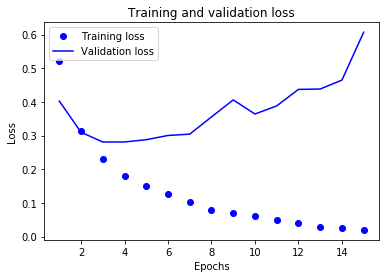

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



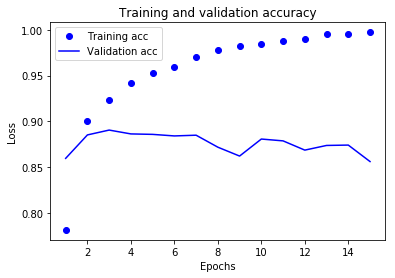

In [22]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()